In [2]:

import numpy 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


In [4]:


train_path = "https://raw.githubusercontent.com/dbloxham1/kaggle_projects/main/bank_churn/train.csv"
test_path = "https://raw.githubusercontent.com/dbloxham1/kaggle_projects/main/bank_churn/test.csv"
train = pd.read_csv(train_path, 
                    sep = ",")
test = pd.read_csv(test_path,
                   sep = ",")

excluded = ['id','CustomerId','Surname','Exited']
smallExcluded = ['id','CustomerId','Surname']
X = train.drop(columns=excluded)
X_all_test = test.drop(columns=smallExcluded)
y = train['Exited']


In [5]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=9515)

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline with preprocessing and logistic regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model on the training set
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Geography', 'Gender'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [7]:

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Make predictions on the testing set
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)



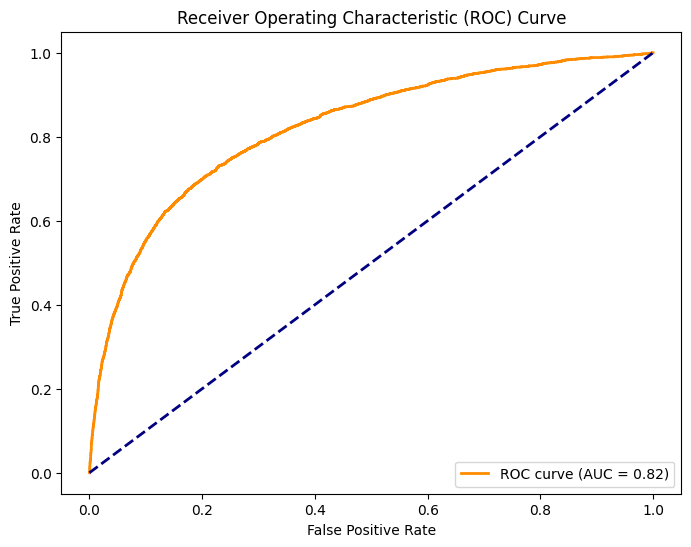

In [8]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [24]:
# Make predictions on the testing set
y_submit = model.predict_proba(X_all_test)[:, 1]  # Probability of class 1

In [45]:
submission = pd.concat([test['id'], pd.Series(y_submit)], axis = 1)
submission = submission.rename(columns={0: 'Exited'})
submission

submission.to_csv('/Users/daynebloxham/GitHub/kaggle_projects/bank_churn/submission.csv', index = False)